#### Results from pharmacophore- and docking-based virtual screening targeting TYK2 Pseudokinase domain (JH2) to identify selective inhibitors through the pipeline illustrated below

![Pipeline](images/TYK2_CADD_Pipeline.png)

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import PandasTools

In [2]:
hits_df = pd.read_csv('../results/16.smi', sep=' ', header=None)
hits_df.shape

(16, 2)

In [3]:
hits_df

,0,1
0,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N)CC,ZINC13131776
1,Clc1c(ccc(Cl)c1)[C@H]3C[C@H](n2nc(nc2N3)N)c4cc...,ZINC13131298
2,O=C(c3cc2n1c(nnc1)c(nc2cc3)NC4CCCC4)c5ccccc5,ZINC06901595
3,O=C(c3cc2n1c(nnc1C)c(nc2cc3)NC[C@@H]4N(CCC4)CC...,ZINC20939758
4,O=C(N(C)C)c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3,ZINC32540567
5,O(C(c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3)C)C,ZINC32541042
6,Fc1c(c(F)ccc1)CNc4n2ncnc2nc(c3ccc(OC)cc3)c4,ZINC23432014
7,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3ccc(OC)cc3)C4)N...,ZINC02472318
8,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N...,ZINC02472304
9,S=C(Nc2nc(c1c(O)cccc1)cc(n2)c3ccc(OC)cc3)N,ZINC01084111


In [4]:
hits_df.columns = ['SMILES', 'ZINC_ID']
hits_df

,SMILES,ZINC_ID
0,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N)CC,ZINC13131776
1,Clc1c(ccc(Cl)c1)[C@H]3C[C@H](n2nc(nc2N3)N)c4cc...,ZINC13131298
2,O=C(c3cc2n1c(nnc1)c(nc2cc3)NC4CCCC4)c5ccccc5,ZINC06901595
3,O=C(c3cc2n1c(nnc1C)c(nc2cc3)NC[C@@H]4N(CCC4)CC...,ZINC20939758
4,O=C(N(C)C)c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3,ZINC32540567
5,O(C(c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3)C)C,ZINC32541042
6,Fc1c(c(F)ccc1)CNc4n2ncnc2nc(c3ccc(OC)cc3)c4,ZINC23432014
7,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3ccc(OC)cc3)C4)N...,ZINC02472318
8,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N...,ZINC02472304
9,S=C(Nc2nc(c1c(O)cccc1)cc(n2)c3ccc(OC)cc3)N,ZINC01084111


,SMILES,ZINC_ID,Mol
0,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N)CC,ZINC13131776,
1,Clc1c(ccc(Cl)c1)[C@H]3C[C@H](n2nc(nc2N3)N)c4cc...,ZINC13131298,
2,O=C(c3cc2n1c(nnc1)c(nc2cc3)NC4CCCC4)c5ccccc5,ZINC06901595,
3,O=C(c3cc2n1c(nnc1C)c(nc2cc3)NC[C@@H]4N(CCC4)CC...,ZINC20939758,
4,O=C(N(C)C)c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3,ZINC32540567,
5,O(C(c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3)C)C,ZINC32541042,
6,Fc1c(c(F)ccc1)CNc4n2ncnc2nc(c3ccc(OC)cc3)c4,ZINC23432014,
7,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3ccc(OC)cc3)C4)N...,ZINC02472318,
8,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N...,ZINC02472304,
9,S=C(Nc2nc(c1c(O)cccc1)cc(n2)c3ccc(OC)cc3)N,ZINC01084111,

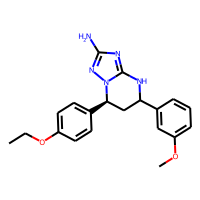
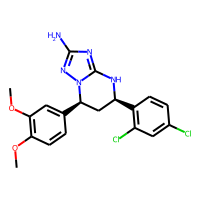
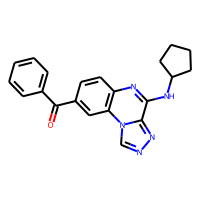
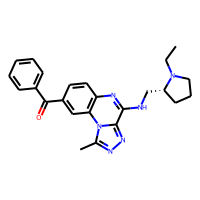
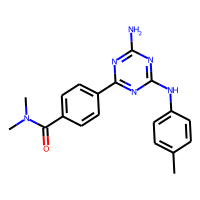
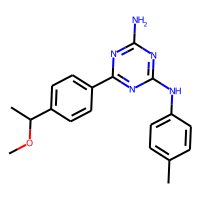
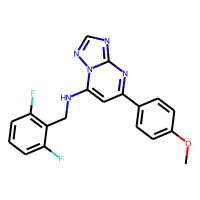
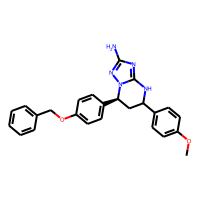
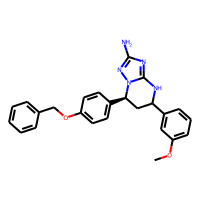
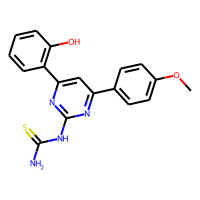
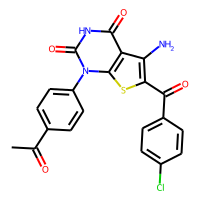
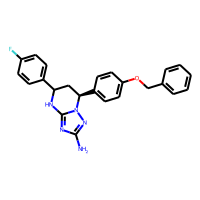
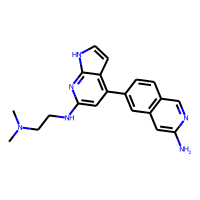
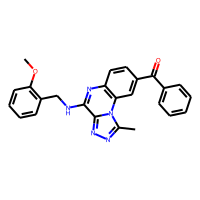
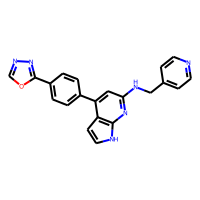
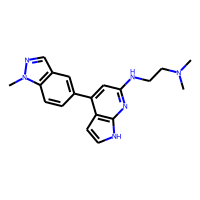

In [5]:
PandasTools.AddMoleculeColumnToFrame(hits_df, 'SMILES', 'Mol')
hits_df

In [6]:
molecules = [Chem.MolFromSmiles(m) for m in hits_df['SMILES']]

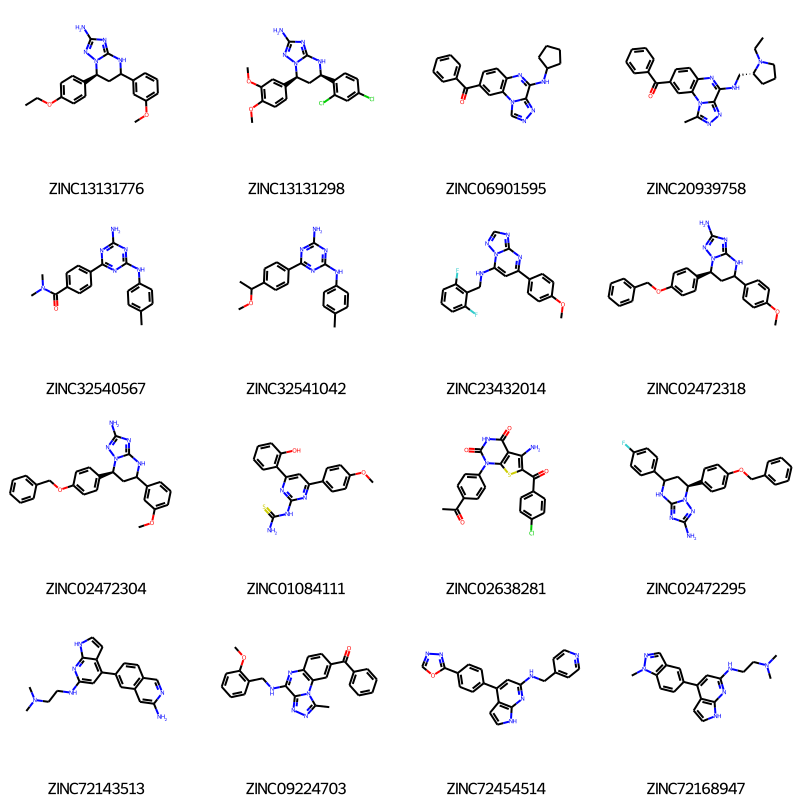

In [7]:
MolsToGridImage([x for x in molecules],
               useSVG=True, molsPerRow=4,
               subImgSize=(200,200),
               legends=[f"{x}" for x in hits_df['ZINC_ID']])

In [8]:
from rdkit.Chem import QED

qed_list = [QED.qed(m) for m in molecules]
qed_list

[0.7203864633232515,
 0.653518332862722,
 0.5615565560749445,
 0.4849126795348229,
 0.7523483858687771,
 0.7357045017110975,
 0.5828318093121403,
 0.4678482661435929,
 0.4678482661435929,
 0.6209545271886019,
 0.4726425674450768,
 0.4929576995484239,
 0.516186638351186,
 0.40685772684468846,
 0.4807601278517356,
 0.588671762802852]

,SMILES,ZINC_ID,Mol,Cluster
0,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N)CC,ZINC13131776,,1
1,Clc1c(ccc(Cl)c1)[C@H]3C[C@H](n2nc(nc2N3)N)c4cc...,ZINC13131298,,13
2,O=C(c3cc2n1c(nnc1)c(nc2cc3)NC4CCCC4)c5ccccc5,ZINC06901595,,12
3,O=C(c3cc2n1c(nnc1C)c(nc2cc3)NC[C@@H]4N(CCC4)CC...,ZINC20939758,,11
4,O=C(N(C)C)c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3,ZINC32540567,,10
5,O(C(c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3)C)C,ZINC32541042,,9
6,Fc1c(c(F)ccc1)CNc4n2ncnc2nc(c3ccc(OC)cc3)c4,ZINC23432014,,8
7,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3ccc(OC)cc3)C4)N...,ZINC02472318,,1
8,O(c1ccc(cc1)[C@H]4n2nc(nc2NC(c3cc(OC)ccc3)C4)N...,ZINC02472304,,1
9,S=C(Nc2nc(c1c(O)cccc1)cc(n2)c3ccc(OC)cc3)N,ZINC01084111,,7

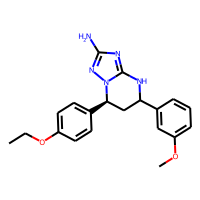
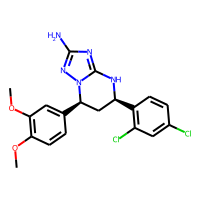
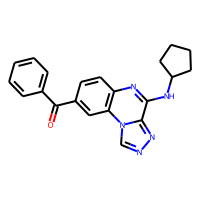
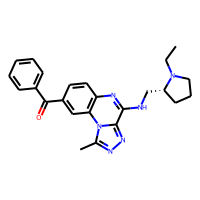
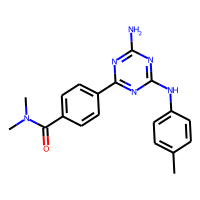
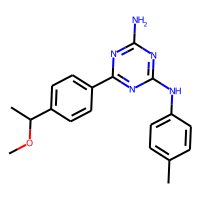
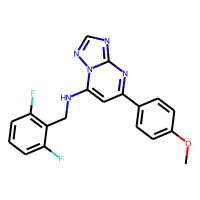
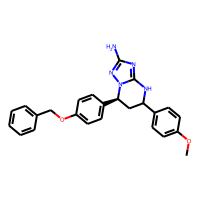
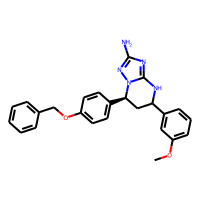
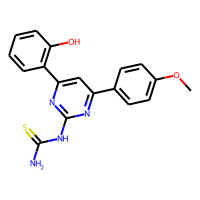
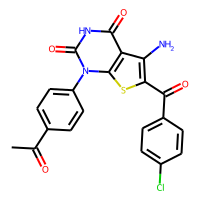
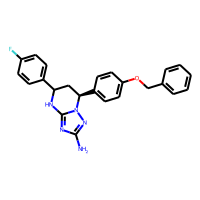
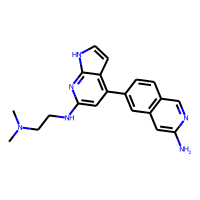
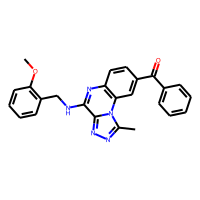
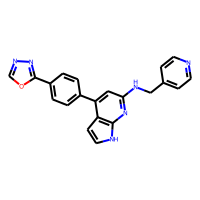
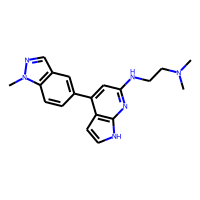

In [9]:
from rdkit import DataStructs                     #fingerprint handling
from rdkit.ML.Cluster import Butina               #cluster molecules
from rdkit.Chem import rdMolDescriptors as rdmd   #descriptors

def butina_cluster(mol_list, cutoff=0.35):
    fp_list = [rdmd.GetMorganFingerprintAsBitVect(m, 3, nBits=2048)
              for m in mol_list]
    dists = []
    nfps = len(fp_list)
    for i in range(1, nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        dists.extend([1-x for x in sims])
    mol_clusters = Butina.ClusterData(dists, nfps, cutoff,
                                     isDistData=True)
    
    cluster_id_list = [0] * nfps
    for idx, cluster in enumerate(mol_clusters, 1):
        for member in cluster:
            cluster_id_list[member] = idx
            
    return cluster_id_list

cluster_df = hits_df.copy()

cluster_df['Cluster'] = butina_cluster(cluster_df.Mol)
cluster_df

In [10]:
len(cluster_df.Cluster.unique())

13

In [11]:
scores_df = pd.read_csv('../results/hits_scores.csv')
scores_df

,Name,Smiles,CNNaffinity,CNNaffinity_variance,CNNscore,minimizedAffinity,Pharm. Score,rmsd
0,BMS-986165,O(c3c(Nc2c(nnc(NC(=O)C1CC1)c2)C(=O)NC)cccc3c4n...,7.85,0.26,1.00,-10.33,NaN,NaN
1,ZINC72454514,o1c(nnc1)c5ccc(c4c2c([nH]cc2)nc(NCc3ccncc3)c4)cc5,7.38,0.19,0.99,-10.15,86.01,0.98
2,ZINC72168947,n1(ncc4c1ccc(c3c2c([nH]cc2)nc(NCCN(C)C)c3)c4)C,7.07,0.15,0.99,-9.75,86.60,0.84
3,ZINC72143513,[nH]2c1nc(NCCN(C)C)cc(c1cc2)c4cc3c(cnc(N)c3)cc4,7.16,0.12,0.99,-10.56,76.65,0.70
4,ZINC20939758,O=C(c3cc2n1c(nnc1C)c(nc2cc3)NCC4N(CCC4)CC)c5cc...,7.57,0.06,0.98,-9.55,67.66,0.96
5,ZINC23432014,Fc1c(c(F)ccc1)CNc4n2ncnc2nc(c3ccc(OC)cc3)c4,7.35,0.08,0.98,-9.34,65.42,0.89
6,ZINC32540567,O=C(N(C)C)c3ccc(c1nc(nc(n1)N)Nc2ccc(cc2)C)cc3,7.11,0.03,0.97,-9.34,46.58,1.08
7,ZINC01084111,S=C(Nc2nc(c1c(O)cccc1)cc(n2)c3ccc(OC)cc3)N,7.09,0.08,0.97,-9.59,45.81,1.00
8,ZINC02638281,Clc1ccc(cc1)C(=O)c3sc2n(c(=O)[nH]c(=O)c2c3N)c4...,7.29,0.10,0.96,-9.52,76.25,0.96
9,ZINC13131776,O(c1ccc(cc1)C4n2nc(nc2NC(c3cc(OC)ccc3)C4)N)CC,7.01,0.03,0.96,-9.02,56.40,0.94


![TYK2_Inhib_Docking_Scores_Interactions](images/TYK2_Inhib_Docking_Scores_Interactions.png)

![TYK2_Inhib_Docking_Pose](images/TYK2_Inhib_Docking_Pose.png)

![TYK2_Inhib_ADME](images/TYK2_Inhib_ADME.png)

![TYK2_Inhib_Tox](images/TYK2_Inhib_Tox.png)